# Shark Attacks Project

### HIPOTESIS

RESUMEN DEL ANALISIS

In [1]:
import pandas as pd
import numpy as np
import re
import calendar
import scr.fun as f
import matplotlib.pyplot as plt

- Creación del DataFrame. Es necesario utilizar la codificación como latin1 ya que el archivo contiene caracteres especiales.

In [2]:
df = pd.read_csv('INPUT/GSAF5.csv', encoding = 'latin1')

- Configuración para poder ver todas las filas y columnas para una mejor exploración de los datos que dispongo y pensar cómo puedo limpiarlos.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### PASO 1: Inspección y descarte de datos.

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

CONCLUSIONES:
1. Observo algún error a corregir en el nombre de algunas las columnas por incluir espacios.
2. A primera vista, parece que hay columnas con datos repetidos, como 'href formula' y 'href' o 'Case Number' y 'Case Number.1' y 'Case Number.2'.
3. Existen columnas cuyo nombre no nos dice mucho, que probablemente no contengan datos relevantes, como 'Unnamed: 22' y 'Unnamed: 23'.

Por otro lado, compruebo el porcentaje de datos nulos que contiene el archivo por cada columna (con ayuda de Felipe).

In [5]:
percentage = (round(df.isnull().sum()/df.shape[0]*100,2))

print('\nPercentage of nulls per column:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per column:

Case Number                 0.0%
Date                        0.0%
Year                        0.0%
Type                        0.0%
Country                    0.72%
Area                       6.71%
Location                   8.28%
Activity                    8.8%
Name                       3.34%
Sex                        9.46%
Age                       44.74%
Injury                     0.45%
Fatal (Y/N)                0.32%
Time                      53.62%
Species                   48.97%
Investigator or Source     0.25%
pdf                         0.0%
href formula               0.02%
href                       0.05%
Case Number.1               0.0%
Case Number.2               0.0%
original order              0.0%
Unnamed: 22               99.98%
Unnamed: 23               99.97%
dtype: object


CONCLUSIONES:
1. Confirmo que las columnas 'Unnamed' están prácticamente vacías, por lo que podemos eliminarlas.
2. Las columnas 'Species', 'Time' y 'Age' tienen un alto porcentaje de celdas vacías, por tanto, dificulta su análisis y no las tendremos en cuenta.

En cuanto a las posibles columnas con valores repetidos, las comparo con sus parecidos para confirmar si existen valores diferentes o no.

- Comparación de columna 'Case Number' con 'Case Number.1' y 'Case Number.2':

In [6]:
print(f.check_dupl_caseNumber(df,df['Case Number']))

There are 13 differences from 5992 total rows.

FALSE:
2016.09.15
2016.09.16
2016.09.15

FALSE:
2016.07.14.4
2016.07.14.R
2016.07.14.4

FALSE:
2016.01.24.b
2015.01.24.b
2016.01.24.b

FALSE:
2015.12.23
2015.11.07
2015.12.23

FALSE:
2015.10.28.a
2015.10.28
2015.10.28.a

FALSE:
2015.07-10
2015.07.10
2015.07.10

FALSE:
1967.07.05
1967/07.05
1967.07.05

FALSE:
1962,08.30.b
1962.08.30.b
1962,08.30.b

FALSE:
1961.09.02.R
1961.09,06.R
1961.09.02.R

FALSE:
1952.08.05
1952.08.04
1952.08.05

FALSE:
1934.01.08.R
1934.02.08.R
1934.02.08.R

FALSE:
1900.00.00.R
1919.00.00.R
1900.00.00.R

FALSE:
1911.07.31.R
1911.07.31.T
1911.07.31.R
None


CONCLUSIÓN:
    Como vemos, hay 13 valores diferentes de 5992 valores en total, lo que supone un 0.22%. Además, si comparamos los 3 valores que difieren, vemos que suelen coincidir dos y uno contiene algún error en número o letra. Por tanto, considero que son repetidos y se pueden eliminar.

- Comparación de columna 'href' con 'href formula':

In [7]:
print(f.check_dupl_href(df,df['href']))

There are 54 differences from 5992 total rows.

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.29-Spain.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.29-Spain.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.23-Cutbirth.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.23.a-Cutbirth.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.21.a-Girl.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.21.a-Girl.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2015.12.21.a-Brazil.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.12.21.a-Brazil.pdf

FALSE:
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2015.11.15.a-Engelman.pdf
h

CONCLUSIÓN:
    Como vemos, hay 54 valores diferentes de 5992 valores en total, lo que supone un 0.9%. Además, si comparamos los 2 valores que difieren, vemos que hacen referencia a lo mismo pero con otra descripción por posibles errores en el texto. Si nos fijamos en el porcentaje de valores nulos, 'href formula' además contiene más vacíos, por lo que la podemos deshechar y quedarnos solamente con 'href'.

Por tanto, según las conclusiones, elimino las columnas vacías y duplicadas:

In [8]:
drop_cols = ['Unnamed: 22', 'Unnamed: 23', 'Case Number.1', 'Case Number.2', 'href']

df = df.drop(drop_cols, axis=1)

cols_analysis = ['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 
                 'Sex ', 'Injury', 'Fatal (Y/N)', 'Investigator or Source', 'pdf', 'href formula',
                 'original order']

df1 = df.loc[:,cols_analysis]

df1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Injury', 'Fatal (Y/N)',
       'Investigator or Source', 'pdf', 'href formula', 'original order'],
      dtype='object')

En este momento, he ido mirando los datos que contiene cada columna para identificar dificultad de limpieza, utilidad y veracidad.

- Case Number: contiene el número del caso registrado, que incluye la fecha y alguna letra. La utilidad que le voy a dar es para crear una nueva columna llamada 'Month' y poder sacar el mes en el que se dio el incidente.

- Date: contiene la fecha del incidente pero no sigue un formato determinado. Difícil de limpiar y repite datos que tenemos en la columna 'Case Number'. Descarto del análisis.

- Year: contiene el año del incidente. Bastante unificado y completo, mantengo para el análisis.

- Type: especifica si el ataque fue provocado o no. Me parece un dato inconsistente ya que no se en qué se han basado para categorizar como provocación de un ataque. Si comparo con las actividades realizadas durante el ataque, el surf se considera tanto en provocado como no provocado, al igual que el nado o la pesca. Descarto del análisis.

- Country: especifica el país donde se ha dado el ataque. Contiene pocos datos nulos y parece consistente. Mantengo para el análisis.

- Area: especifica la ciudad/estado en el que ha surgido el ataque. Me basaré en el país del incidente, por tanto, descarto del análisis.

- Location: especifica la playa donde se ha dado el ataque. Contiene muy pocos datos agrupados. Me basaré en el país del incidente, por tanto, descarto del análisis.

- Activity: especifica la actividad que realizaba la víctima en el momento del ataque. Los datos están muy dispersos y hay que reagruparlos bajo una misma categoría. Mantengo para el análisis.

- Name: se pretende identificar el nombre de la víctima pero la gran mayoría son datos sin especificar. No nos interesa para el análisis.

- Sex: determina el sexo de la víctima. Casi un 10% de los datos son nulos, lo que considero demasiado para tener en cuenta en el análisis.

- Injury: especifica en qué parte del cuerpo fue el ataque. Datos muy dispersos que hay que reagrupar bajo una misma categoría. Mantengo para el análisis.

- Fatal: identifica si el ataque fue mortal o tuvo consecuencias graves para la víctima (o eso entiendo yo). Como la interpretación es ambigua y, además, la categoría fatal también aparece en la columna de 'Injury', lo descarto del análisis.

- Investigator or Source: especifica la fuente. Está muy atomizado y no necesito esta información para el análisis, por tanto, lo descarto.

- pdf y href formula: uno contiene los enlaces completos al pdf del caso, y el otro contiene solo el nombre del pdf. Al no necesitarlo para el análisis, lo descarto.

- Original order: no se a qué hacen referencia los números aportados, por lo que, descarto del análisis.

In [9]:
cols_analysis = ['Case Number', 'Year', 'Country', 'Activity', 'Injury']

attacks = df.loc[:,cols_analysis]

attacks.columns

Index(['Case Number', 'Year', 'Country', 'Activity', 'Injury'], dtype='object')

### PASO 2: Limpieza de datos

#### COLUMNA MONTH

Creo una columna con el mes en el que ha surgido el ataque, en base a la columna 'Case Number'.

In [10]:
# Extraigo el mes de la columna 'Case Number':

attacks['Month'] = attacks['Case Number'].str.extract('(\.\d{2}\.)')

# Elimino los dos puntos que se han extraido:

attacks['Month'] = attacks['Month'].str.extract('(\d{2})')

# En algunos casos, el 'Case Number' no indica el mes por falta de información. Sustituyo los valores nulos por 0:

attacks.Month = attacks.Month.fillna(0).astype('int')

# Cambio los valores extraidos por el nombre del mes correspondiente:

for x in range(1,13):
    
    attacks.loc[attacks['Month'] == x, 'Month'] = calendar.month_name[x]
    attacks.loc[attacks['Month'] == 30, 'Month'] = 'August'

# Los valores nulos sustituidos por 0, los identifico como 'Unknown'. Suponen un 6.4% sobre el total:

attacks.loc[attacks['Month'] == 0, 'Month'] = 'Unknown'

Compruebo el peso que tiene cada mes sobre el total de registros para comprobar que los nulos no suponen un porcentaje muy elevado. En este momento suponen un 8.7%, sin embargo, a lo largo del análisis este porcentaje bajará hasta el 6.4% debido a la omisión de algunos de los datos que considero a descartar más adelante.

In [11]:
percentage = (round(attacks.Month.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per month:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per month:

July         10.56%
August        9.68%
September     8.74%
Unknown       8.73%
January       8.34%
June          7.91%
December      7.06%
April         6.84%
October       6.79%
March         6.64%
November      6.56%
May           6.14%
February      5.99%
Name: Month, dtype: object


In [12]:
order = ['Case Number', 'Month', 'Year', 'Country', 'Activity', 'Injury']

attacks = attacks.loc[:,order]

attacks.head()

,Case Number,Month,Year,Country,Activity,Injury
0,2016.09.18.c,September,2016,USA,Surfing,Minor injury to thigh
1,2016.09.18.b,September,2016,USA,Surfing,Lacerations to hands
2,2016.09.18.a,September,2016,USA,Surfing,Lacerations to lower leg
3,2016.09.17,September,2016,AUSTRALIA,Surfing,Struck by fin on chest & leg
4,2016.09.15,September,2016,AUSTRALIA,Surfing,No injury: Knocked off board by shark


#### COLUMNA YEAR

Elimino de la tabla valores anteriores al año 1800, ya que debido a su antiguedad son poco fiables, ofrecían poca información en las columnas restantes, al igual que los años con valor 0. Con ello también eliminamos datos errónes que teníamos al final de la serie, como el año 500, 77 o 5.

In [13]:
# Compruebo los valores únicos de la columna:

display(attacks["Year"].unique())

# Decido no tener en cuenta los datos anteriores al año 1800 por prudencia.

attacks = attacks[attacks["Year"] >= 1800]

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 1909, 1908,
       1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897,
       1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886,
       1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877, 1876, 1875,
       1874, 1873, 1872, 1871, 1870, 1869, 1868, 18

#### COLUMNA COUNTRY

Adapto los nombres a un formato correcto y, tanto los nulos como los que no aparecen más de 10 veces en el DataFrame, los categorizo como 'Otros' para reducir la atomización de datos.

In [14]:
# Hay 35 celdas vacías que categorizo como 'Otros':

attacks.Country = attacks.Country.fillna('OTHER')

# Adapto los nombres a mayúsculas y quito los espacios que contengan:

attacks['Country'] = attacks['Country'].str.upper()

attacks['Country'] = f.first_space(attacks['Country'].str)

# Mantengo los nombres de los países que se repiten más de 10 veces:

attacks_country = attacks['Country'].value_counts()
attacks_country = attacks_country[attacks_country >= 10]

# El resto, los agrupo como 'Otros', categoría que supone un 7,6% del total:

ind = attacks_country.index.tolist()

countries = []

for i in range(len(attacks.index)):
    if attacks.loc[i,'Country'] in ind:
        countries.append(attacks.loc[i,'Country'])
    else:
        countries.append('OTHER')
        
attacks["Country"] = countries

In [15]:
percentage = (round(attacks.Country.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per country:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per country:

USA                     35.93%
AUSTRALIA                21.6%
SOUTH AFRICA             9.55%
OTHER                    7.66%
PAPUA NEW GUINEA         2.21%
NEW ZEALAND              2.13%
BRAZIL                   1.75%
BAHAMAS                  1.63%
MEXICO                   1.37%
ITALY                    1.15%
FIJI                     1.06%
PHILIPPINES              1.03%
REUNION                  0.94%
NEW CALEDONIA            0.87%
MOZAMBIQUE               0.72%
CUBA                     0.69%
SPAIN                    0.65%
EGYPT                    0.62%
CROATIA                  0.58%
INDIA                    0.55%
JAPAN                    0.55%
PANAMA                    0.5%
SOLOMON ISLANDS          0.46%
IRAN                     0.43%
HONG KONG                0.41%
JAMAICA                  0.39%
FRENCH POLYNESIA         0.36%
GREECE                   0.33%
INDONESIA                0.33%
TONGA                    0.31%
ENGLAND                  0.31%
PACI

#### COLUMNA ACTIVITY

Esta columna, al ser descriptiva, contiene muchos datos que describen una misma actividad de diferentes maneras, por tanto, es necesario unificar bajo una misma categoría. Llegado a un punto donde las datos se dispersan mucho, los englobo bajo un mismo concepto de 'Otros', que suponen solo el 6.6% total de datos saneados.

In [16]:
# Hay 497 celdas vacías que categorizo como 'Desconocido':

attacks.Activity = attacks.Activity.fillna('Unknown')

# Agrupo actividades afines bajo un mismo nombre:

attacks.loc[attacks['Activity'].str.contains('surf', case=False), 'Activity'] = 'Surfing'

attacks.loc[attacks['Activity'].str.contains('swim', case=False)|
            attacks['Activity'].str.contains('bath', case=False)|
            attacks['Activity'].str.contains('float', case=False)|
            attacks['Activity'].str.contains('water', case=False)|
            attacks['Activity'].str.contains('splash', case=False), 'Activity'] = 'Swimming'


attacks.loc[attacks['Activity'].str.contains('fish', case=False)|
            attacks['Activity'].str.contains('crab', case=False)|
            attacks['Activity'].str.contains('clam', case=False)|
            attacks['Activity'].str.contains('kill', case=False)|
            attacks['Activity'].str.contains('hunt', case=False)|
            attacks['Activity'].str.contains('catch', case=False)|
            attacks['Activity'].str.contains('shoot', case=False), 'Activity'] = 'Fishing'

attacks.loc[attacks['Activity'].str.contains('div', case=False)|
            attacks['Activity'].str.contains('snork', case=False), 'Activity'] = 'Diving'

attacks.loc[attacks['Activity'].str.contains('wad', case=False)|
            attacks['Activity'].str.contains('stand', case=False)|
            attacks['Activity'].str.contains('walk', case=False)|
            attacks['Activity'].str.contains('tread', case=False)|
            attacks['Activity'].str.contains('wash', case=False)|
            attacks['Activity'].str.contains('sit', case=False)|
            attacks['Activity'].str.contains('play', case=False), 'Activity'] = 'Shore'

attacks.loc[attacks['Activity'].str.contains('kayak', case=False)|
            attacks['Activity'].str.contains('board', case=False)|
            attacks['Activity'].str.contains('row', case=False)|
            attacks['Activity'].str.contains('canoe', case=False)|
            attacks['Activity'].str.contains('sail', case=False)|
            attacks['Activity'].str.contains('boat', case=False)|
            attacks['Activity'].str.contains('paddl', case=False)|
            attacks['Activity'].str.contains('fell', case=False), 'Activity'] = 'Water sports'

# Mantengo las actividades que se repitan más de 10 veces:

attacks_activities = attacks['Activity'].value_counts()
attacks_activities = attacks_activities[attacks_activities >= 10]

# El resto, los agrupo como Otros, categoría que supone un 6.6% del total:

ind = attacks_activities.index.tolist()

activities = []

for i in range(len(attacks.index)):
    if attacks.loc[i,'Activity'] in ind:
        activities.append(attacks.loc[i,'Activity'])
    else:
        activities.append('OTHER')

attacks["Activity"] = activities

In [17]:
percentage = (round(attacks.Activity.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per activity:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per activity:

Swimming        24.22%
Surfing         20.26%
Fishing         19.18%
Diving           9.05%
Unknown          8.57%
Water sports     6.62%
OTHER            6.57%
Shore            5.52%
Name: Activity, dtype: object


#### COLUMNA INJURY

Mismo caso que el anterior, con la diferencia de que agrupo según la parte del cuerpo que haya sido afectada por el ataque del tiburón. Llegado a un punto donde las datos se dispersan mucho, los englobo bajo un mismo concepto de 'Otros', que suponen solo el 6.5% del total de datos saneados.

In [18]:
# Hay 20 celdas vacías que categorizo como 'Desconocido':

attacks.Injury = attacks.Injury.fillna('Unknown')

# Agrupo los daños que ha sufrido la víctima según la parte del cuerpo afectada:

attacks.loc[attacks['Injury'].str.contains('foot', case=False)|
            attacks['Injury'].str.contains('leg', case=False)|
            attacks['Injury'].str.contains('thigh', case=False)|
            attacks['Injury'].str.contains('calf', case=False)|
            attacks['Injury'].str.contains('ankle', case=False)|
            attacks['Injury'].str.contains('heel', case=False)|
            attacks['Injury'].str.contains('toe', case=False)|
            attacks['Injury'].str.contains('shin', case=False)|
            attacks['Injury'].str.contains('feet', case=False)|
            attacks['Injury'].str.contains('knee', case=False), 'Injury'] = 'Leg'

attacks.loc[attacks['Injury'].str.contains('hand', case=False)|
            attacks['Injury'].str.contains('arm', case=False)|
            attacks['Injury'].str.contains('finger', case=False)|
            attacks['Injury'].str.contains('shoul', case=False)|
            attacks['Injury'].str.contains('wrist', case=False)|
            attacks['Injury'].str.contains('elbo', case=False), 'Injury'] = 'Arm'

attacks.loc[attacks['Injury'].str.contains('torso', case=False)|
            attacks['Injury'].str.contains('hip', case=False)|
            attacks['Injury'].str.contains('chest', case=False)|
            attacks['Injury'].str.contains('butt', case=False)|
            attacks['Injury'].str.contains('back', case=False)|
            attacks['Injury'].str.contains('abdom', case=False), 'Injury'] = 'Trunk'

attacks.loc[attacks['Injury'].str.contains('no injury', case=False)|
            attacks['Injury'].str.contains('minor', case=False)|
            attacks['Injury'].str.contains('fin', case=False)|
            attacks['Injury'].str.contains('lacer', case=False), 'Injury'] = 'No injury'

attacks.loc[attacks['Injury'].str.contains('fatal', case=False)|
            attacks['Injury'].str.contains('drow', case=False), 'Injury'] = 'FATAL'

attacks.loc[attacks['Injury'].str.contains('survi', case=False)|
            attacks['Injury'].str.contains('detail', case=False), 'Injury'] = 'Unknown'

# Mantengo los ataques que se repiten más de 10 veces:

attacks_injuries = attacks['Injury'].value_counts()

attacks_injuries = attacks_injuries[attacks_injuries >= 10]

# El resto, los agrupo como Otros, suponen un 6.5% del total:

ind = attacks_injuries.index.tolist()

injuries = []

for i in range(len(attacks.index)):
    if attacks.loc[i,'Injury'] in ind:
        injuries.append(attacks.loc[i,'Injury'])
    else:
        injuries.append('OTHER')

attacks["Injury"] = injuries

In [19]:
percentage = (round(attacks.Injury.value_counts()/attacks.shape[0]*100,2))

print('\nPercentage of nulls per injury:\n\n{}'.format(percentage.apply(lambda x: f'{x}%')))


Percentage of nulls per injury:

Leg          41.63%
FATAL        16.96%
Arm          14.73%
No injury    14.02%
OTHER         6.51%
Unknown        3.5%
Trunk         2.66%
Name: Injury, dtype: object


### PASO 3: Análisis

In [20]:
attacks.head()

,Case Number,Month,Year,Country,Activity,Injury
0,2016.09.18.c,September,2016,USA,Surfing,Leg
1,2016.09.18.b,September,2016,USA,Surfing,Arm
2,2016.09.18.a,September,2016,USA,Surfing,Leg
3,2016.09.17,September,2016,AUSTRALIA,Surfing,Leg
4,2016.09.15,September,2016,AUSTRALIA,Surfing,No injury


nº de ataques por rango de año.

In [29]:
attacks.groupby('Year').agg({'Year':'count'}).plot.hist(bins=20, x='Year')

plt.title('Historical Shark Attacks by Month');

TypeError: no numeric data to plot

En la siguiente gráfico podemos ver el registro del número de ataques de tiburón que se han dado según el mes del año. Como podemos observar, la mayor parte de los casos se dan en los meses de julio, agosto y septiembre, aunque no hay una clara evidencia de ser los meses más representativos. PUEDE SER POR LAS DIFERENTES EPOCAS DEL AÑO SEGUN EL CONTINENTE.

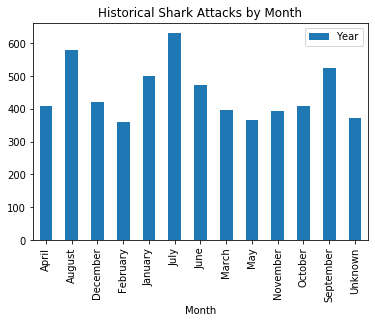

In [42]:
attacks.groupby('Month').agg({'Year':'count'}).plot.bar()

# AVERIGUAR COMO PUEDO ORDENAR POR MES SEGUN CALENDARIO, NO ALFABETICAMENTE.

plt.title('Historical Shark Attacks by Month');

La gran mayoría de los ataques de tiburón surgen en USA y Australia.

Text(0.5, 1.0, 'Historical Shark Attacks by Country')

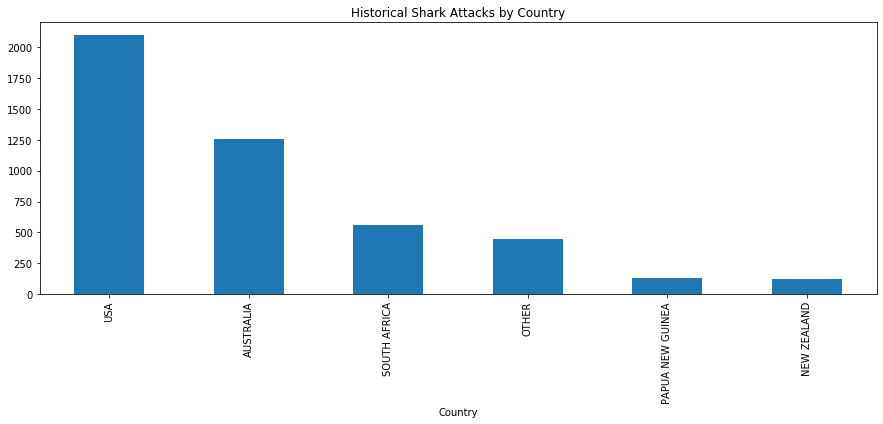

In [39]:
attacks.groupby('Country').Year.count().sort_values(ascending=False).iloc[:6].plot.bar(figsize=(15,5))

plt.title('Historical Shark Attacks by Country')

La razón principal del ataque de tiburón en USA es el nado y el surf, seguido de la pesca.

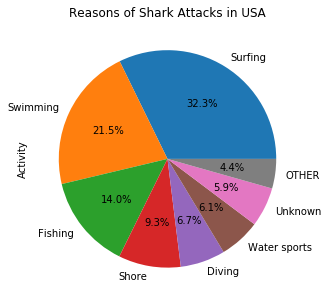

In [29]:
def pie_country_act(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Activity').Activity.count().sort_values(ascending=False)
    plt.title(f'Reasons of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

display(pie_country_act('USA'))

El ataque de tiburón en USA es principalmente a las extremidades, sobre todo en piernas. Siendo la causa principal el nado y el surf, son las partes más vulnerables a un ataque.

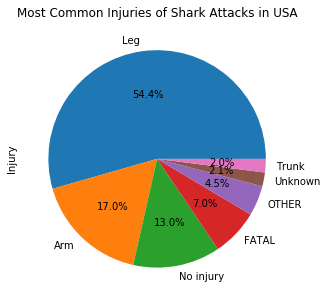

In [30]:
def pie_country_inj(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Injury').Injury.count().sort_values(ascending=False)
    plt.title(f'Most Common Injuries of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

display(pie_country_inj('USA'))

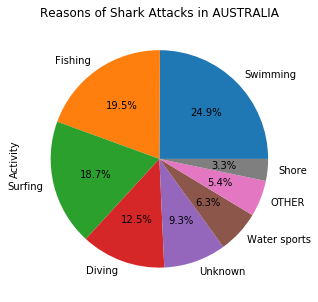

In [31]:
def pie_country_act(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Activity').Activity.count().sort_values(ascending=False)
    plt.title(f'Reasons of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

display(pie_country_act('AUSTRALIA'))

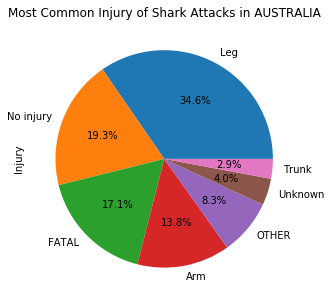

In [32]:
def pie_country_inj(country):
    filt = attacks[attacks['Country'] == country]
    activ = filt.groupby('Injury').Injury.count().sort_values(ascending=False)
    plt.title(f'Most Common Injury of Shark Attacks in {country}')
    return activ.plot.pie(figsize=(5,5), autopct='%1.1f%%')

display(pie_country_inj('AUSTRALIA'))